<div style='font-size:200%;'>
    <a></a>
    <h1 style='color: green; font-weight: bold; font-family: Cascadia code;'>
        <center>Lung cancer prediction using Image-Segmentation, Equalization and Transfer learning</center>
    </h1>
</div>

- - -

<!-- <div style='font-size:200%;'>
    <a id='nan'></a>
    <h1 style='color: chartreuse; font-weight: bold; font-family: Cascadia code;'> Contents </h1>
</div> -->

<!-- - [Importing the necessary libraries ](#import)
- [Data Pre-processing](#preprocess)
- [Exploratory Data Analysis](#eda)
    - [NaN values heat-map](#heatmap)
    - [Typecasting and dropping columns](#typecast)
    - [Correlation between different features and our target variable](#corr)
    - [Distribution of Individuals based on HomePlanet](#planet)
- [Distribution of transported individuals](#trans)
- [Data Pre-processing](#preprocess)
    - [Imputing missing data](#impute)
    - [Typecasting and dropping columns](#typecast)
    - [One-Hot Encoding](#ohe)
    - [Splitting data into x (Values) and y (labels)](#split)
- [Classifying](#classify)
    - [Building and fitting the models](#build)
    - [Performance Analysis of the different models](#anal)
- [Submission](#submit) -->

- - -

## **Abstract:**
 
The second leading cause of death is cancer [9]. From this large domain of cancer, lung cancer is one of the main reasons for death in the world among both men and women, with an impressive rate of about five million deadly cases per year. Every year more than 2,00,000 cases are found in US [11]. Because of high quantity data in CT images and blurred boundaries, tumor segmentation and classification is very hard. In MR images, the amount of data is too much for manual interpretation and analysis. At a very early stage, cancer is not being found because of the small size of the nodules and location of the glands [11]. 
 Machine Learning makes the diagnosis process easier and deterministic. This work has introduced one automatic lung cancer detection method to increase the accuracy and yield and decrease the diagnosis time. The main objective of this work is to detect the cancerous lung nodules from a given input lung image and to predict the lung cancer using Deep Learning technique more efficiently than the existings. 

- - -

<h1 ><a id='contents'><b>Contents<b></a></h1>

- [Importing necessary libraries](#import)
- [Proposed methodology](#methodology)
- [Data Pre-processing](#preprocess)
- [Comparison between processed and unprocessed image](#comparison)
- [Splitting the processed images](#split)
- [Neural nets](#nn)
    - [CNN](#cnn)
    - [VGG16](#vgg16)
    - [MobileNet](#mobilenet)
- [Example: Prediction vs Truth](#example)
- [Comparative analysis of the models](#analysis)
- [References](#references)

- - -

<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Importing the necessary libraries</center>
    </h1>
</div>

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
import splitfolders
import pandas as pd
import seaborn as sns

<div style='font-size:100%;'>
    <a id='methodology'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Proposed Methodology</center>
    </h1>
</div>

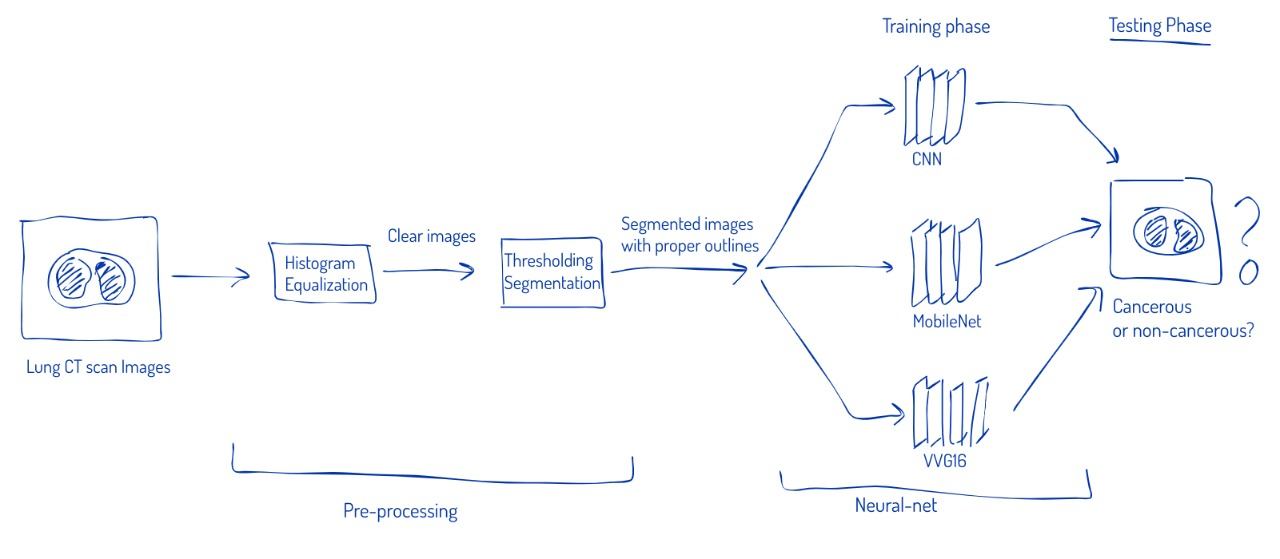

In [3]:
Image(filename='./methodology.jpeg') 

<div style='font-size:100%;'>
    <a id='preprocess'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Data Pre-processing</center>
    </h1>
</div>

## **Histogram Equalization**

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

## **Threshold Segmentation**

Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

#### ***We will preprocess our raw data by histogram equalization and then segment it using thresholding***

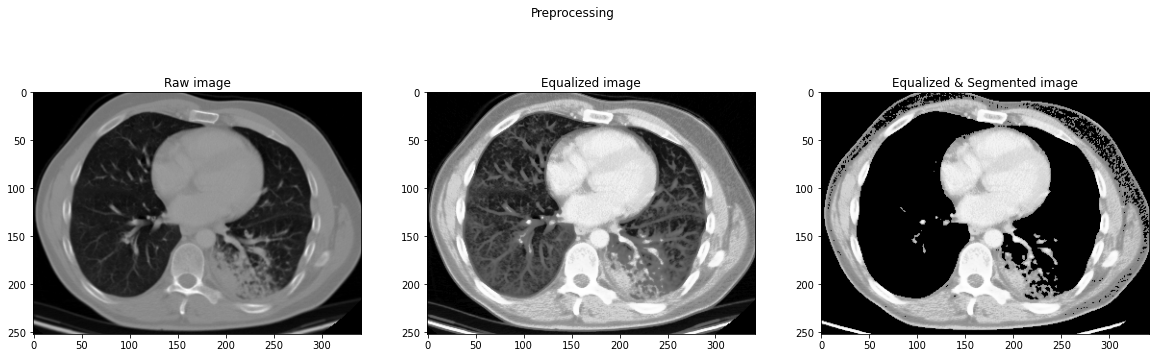

In [75]:
img = cv2.imread('./rawData/squamous.cell.carcinoma/image1.png', 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [59]:
print(os.getcwd(), os.listdir())
DIR = './rawData'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = './data'

/content ['.config', 'drive', 'MOBILENET.png', 'data', 'CNN.png', 'processedData', 'rawData', 'VGG16.png', 'sample_data']


In [ ]:
!unzip /content/drive/MyDrive/rawData.zip -d /content

In [9]:
if not os.path.exists(DEST_DIR):
    !mkdir data && cd data && mkdir cancerous && mkdir non-cancerous

for category in CATS:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        curr = os.path.join(path, image)
        img = cv2.imread(curr, 0)
        equalizedImage = cv2.equalizeHist(img)
        e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)
        if category == 'normal':
            imgDest = curr.replace('rawData/normal', 'data/non-cancerous')
            cv2.imwrite(imgDest, segmentedImage)
        else:
            imgDest = curr.replace('rawData/adenocarcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/large.cell.carcinoma', 'data/cancerous')
            imgDest = imgDest.replace('rawData/squamous.cell.carcinoma', 'data/cancerous')
            cv2.imwrite(imgDest, segmentedImage)
print("Processed data directory created successfully at", DEST_DIR)

Processed data directory created successfully at ./data


<div style='font-size:100%;'>
    <a id='comparison'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Comparison between processed and unprocessed image</center>
    </h1>
</div>

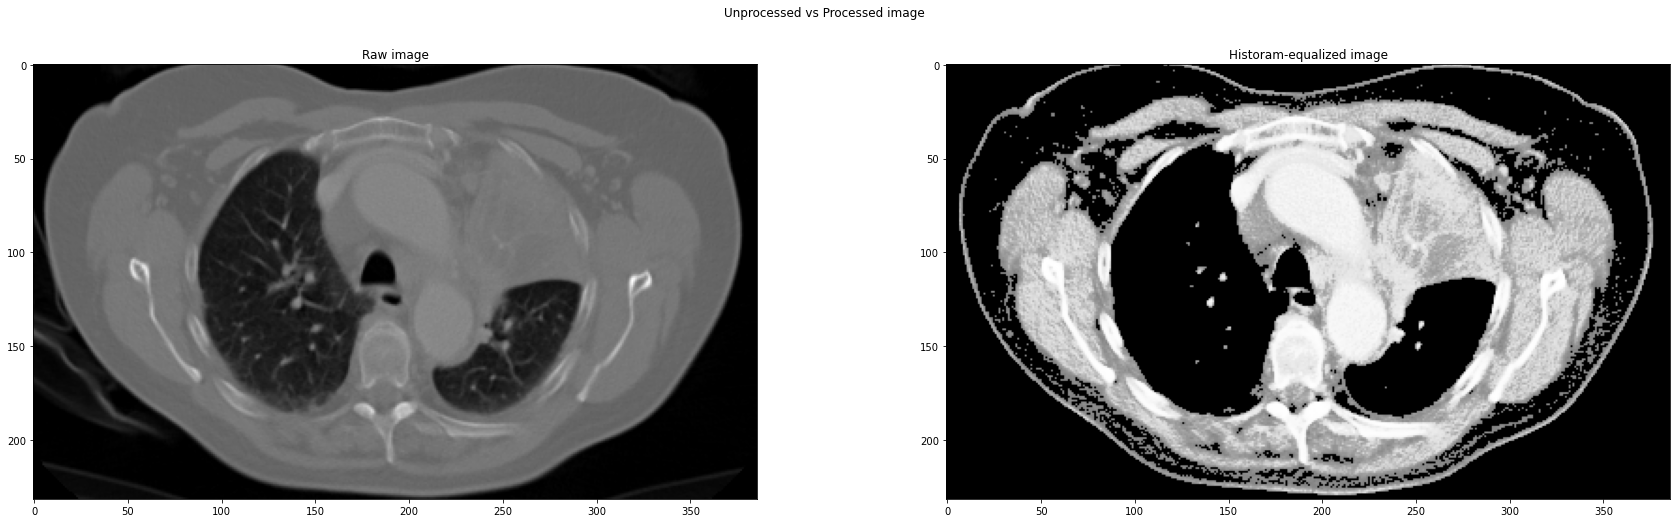

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

<div style='font-size:100%;'>
    <a id='split'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Splitting the processed images</center>
    </h1>
</div>

In [12]:
FINAL_DIR = './processedData'

splitfolders.ratio(DEST_DIR, output=FINAL_DIR, seed=69420, ratio=(.7, 0.1,0.2)) 

Copying files: 553 files [00:00, 4781.60 files/s]


In [6]:
BATCH_SIZE=4


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,                  
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_dataset  = train_datagen.flow_from_directory(directory = './processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 386 images belonging to 2 classes.


In [8]:
valid_dataset = valid_datagen.flow_from_directory(directory = './processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 54 images belonging to 2 classes.


In [9]:
test_dataset = test_datagen.flow_from_directory(directory = './processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 113 images belonging to 2 classes.


<div style='font-size:100%;'>
    <a id='nn'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Neural nets</center>
    </h1>
</div>

In [10]:
def F1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),  
      tf.keras.metrics.AUC(name='AUC'),
      F1,
]

<h1 align="center" ><a id='cnn'><b>CNN<b></a></h1>

In [76]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)      

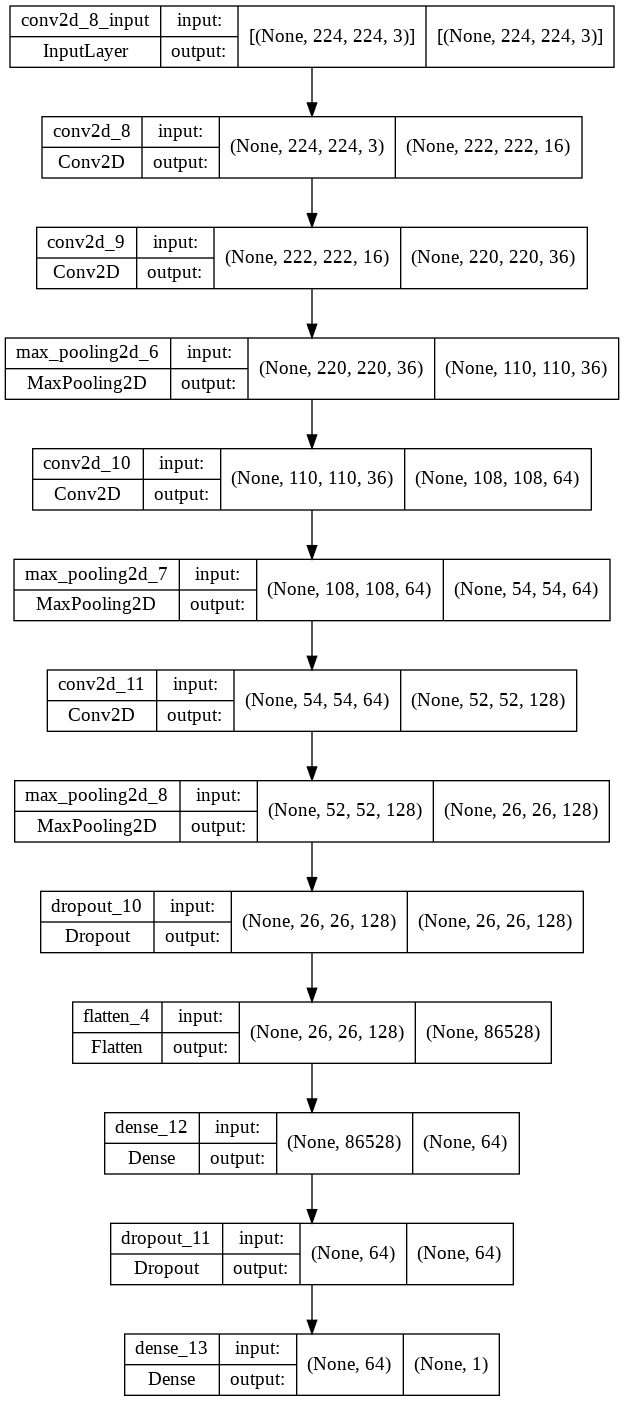

In [77]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)
Image(filename='CNN.png')

In [78]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
13/13 [==============================] - ETA: 0s - loss: 0.7188 - Accuracy: 0.6353 - Precision: 0.5357 - Recall: 0.4639 - AUC: 0.6913 - F1: 0.1938

13/13 [==============================] - 7s 451ms/step - loss: 0.7188 - Accuracy: 0.6353 - Precision: 0.5357 - Recall: 0.4639 - AUC: 0.6913 - F1: 0.1938 - val_loss: 0.6618 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.6732 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
13/13 [==============================] - ETA: 0s - loss: 0.6335 - Accuracy: 0.6269 - Precision: 0.8000 - Recall: 0.0533 - AUC: 0.6901 - F1: 0.1618

13/13 [==============================] - 5s 394ms/step - loss: 0.6335 - Accuracy: 0.6269 - Precision: 0.8000 - Recall: 0.0533 - AUC: 0.6901 - F1: 0.1618 - val_loss: 0.4851 - val_Accuracy: 0.8333 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.8701 - val_F1: 0.7143 - lr: 0.0010
Epoch 3/36
13/13 [==============================] - ETA: 0s - loss: 0.5745 - Accuracy: 0.6943 - Precision: 0.7162 - Recall: 0.3533 - AUC: 0.7547 - F1: 0.4203

13/13 [==============================] - 5s 390ms/step - loss: 0.5745 - Accuracy: 0.6943 - Precision: 0.7162 - Recall: 0.3533 - AUC: 0.7547 - F1: 0.4203 - val_loss: 0.4589 - val_Accuracy: 0.8148 - val_Precision: 0.6897 - val_Recall: 0.9524 - val_AUC: 0.9329 - val_F1: 0.8013 - lr: 0.0010
Epoch 4/36
13/13 [==============================] - ETA: 0s - loss: 0.5380 - Accuracy: 0.7306 - Precision: 0.6797 - Recall: 0.5800 - AUC: 0.7910 - F1: 0.5725

13/13 [==============================] - 5s 394ms/step - loss: 0.5380 - Accuracy: 0.7306 - Precision: 0.6797 - Recall: 0.5800 - AUC: 0.7910 - F1: 0.5725 - val_loss: 0.3997 - val_Accuracy: 0.8704 - val_Precision: 1.0000 - val_Recall: 0.6667 - val_AUC: 0.9026 - val_F1: 0.8000 - lr: 0.0010
Epoch 5/36
13/13 [==============================] - ETA: 0s - loss: 0.5069 - Accuracy: 0.7435 - Precision: 0.7339 - Recall: 0.5333 - AUC: 0.8274 - F1: 0.5602

13/13 [==============================] - 5s 391ms/step - loss: 0.5069 - Accuracy: 0.7435 - Precision: 0.7339 - Recall: 0.5333 - AUC: 0.8274 - F1: 0.5602 - val_loss: 0.3082 - val_Accuracy: 0.9630 - val_Precision: 0.9130 - val_Recall: 1.0000 - val_AUC: 0.9913 - val_F1: 0.9537 - lr: 0.0010
Epoch 6/36
13/13 [==============================] - ETA: 0s - loss: 0.5344 - Accuracy: 0.7539 - Precision: 0.7165 - Recall: 0.6067 - AUC: 0.8112 - F1: 0.5439

13/13 [==============================] - 5s 398ms/step - loss: 0.5344 - Accuracy: 0.7539 - Precision: 0.7165 - Recall: 0.6067 - AUC: 0.8112 - F1: 0.5439 - val_loss: 0.5084 - val_Accuracy: 0.8333 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.9531 - val_F1: 0.7222 - lr: 0.0010
Epoch 7/36
13/13 [==============================] - ETA: 0s - loss: 0.6000 - Accuracy: 0.6788 - Precision: 0.5691 - Recall: 0.7133 - AUC: 0.7433 - F1: 0.5706

13/13 [==============================] - 5s 393ms/step - loss: 0.6000 - Accuracy: 0.6788 - Precision: 0.5691 - Recall: 0.7133 - AUC: 0.7433 - F1: 0.5706 - val_loss: 0.5133 - val_Accuracy: 0.8519 - val_Precision: 0.9333 - val_Recall: 0.6667 - val_AUC: 0.9380 - val_F1: 0.7625 - lr: 0.0010
Epoch 8/36
13/13 [==============================] - ETA: 0s - loss: 0.5517 - Accuracy: 0.6839 - Precision: 0.8500 - Recall: 0.2267 - AUC: 0.8297 - F1: 0.3242

13/13 [==============================] - 5s 393ms/step - loss: 0.5517 - Accuracy: 0.6839 - Precision: 0.8500 - Recall: 0.2267 - AUC: 0.8297 - F1: 0.3242 - val_loss: 0.3066 - val_Accuracy: 0.8519 - val_Precision: 0.8824 - val_Recall: 0.7143 - val_AUC: 0.9437 - val_F1: 0.7738 - lr: 0.0010
Epoch 9/36
13/13 [==============================] - ETA: 0s - loss: 0.4649 - Accuracy: 0.7979 - Precision: 0.7727 - Recall: 0.6800 - AUC: 0.8636 - F1: 0.6652

13/13 [==============================] - 5s 397ms/step - loss: 0.4649 - Accuracy: 0.7979 - Precision: 0.7727 - Recall: 0.6800 - AUC: 0.8636 - F1: 0.6652 - val_loss: 0.2232 - val_Accuracy: 0.9444 - val_Precision: 0.9500 - val_Recall: 0.9048 - val_AUC: 0.9856 - val_F1: 0.9282 - lr: 0.0010
Epoch 10/36
13/13 [==============================] - ETA: 0s - loss: 0.3824 - Accuracy: 0.8316 - Precision: 0.8102 - Recall: 0.7400 - AUC: 0.9092 - F1: 0.7700

13/13 [==============================] - 5s 392ms/step - loss: 0.3824 - Accuracy: 0.8316 - Precision: 0.8102 - Recall: 0.7400 - AUC: 0.9092 - F1: 0.7700 - val_loss: 0.1638 - val_Accuracy: 0.9259 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9841 - val_F1: 0.9150 - lr: 0.0010
Epoch 11/36
13/13 [==============================] - ETA: 0s - loss: 0.4610 - Accuracy: 0.8238 - Precision: 0.8060 - Recall: 0.7200 - AUC: 0.8653 - F1: 0.6857

13/13 [==============================] - 7s 515ms/step - loss: 0.4610 - Accuracy: 0.8238 - Precision: 0.8060 - Recall: 0.7200 - AUC: 0.8653 - F1: 0.6857 - val_loss: 0.3614 - val_Accuracy: 0.8333 - val_Precision: 0.7000 - val_Recall: 1.0000 - val_AUC: 0.9704 - val_F1: 0.8235 - lr: 0.0010
Epoch 12/36
13/13 [==============================] - ETA: 0s - loss: 0.4052 - Accuracy: 0.8161 - Precision: 0.8160 - Recall: 0.6800 - AUC: 0.9013 - F1: 0.7252

13/13 [==============================] - 5s 388ms/step - loss: 0.4052 - Accuracy: 0.8161 - Precision: 0.8160 - Recall: 0.6800 - AUC: 0.9013 - F1: 0.7252 - val_loss: 0.2345 - val_Accuracy: 0.9259 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9690 - val_F1: 0.9028 - lr: 0.0010
Epoch 13/36
13/13 [==============================] - ETA: 0s - loss: 0.4450 - Accuracy: 0.8031 - Precision: 0.7372 - Recall: 0.7667 - AUC: 0.8683 - F1: 0.6938
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


13/13 [==============================] - 5s 397ms/step - loss: 0.4450 - Accuracy: 0.8031 - Precision: 0.7372 - Recall: 0.7667 - AUC: 0.8683 - F1: 0.6938 - val_loss: 0.2706 - val_Accuracy: 0.8519 - val_Precision: 1.0000 - val_Recall: 0.6190 - val_AUC: 0.9848 - val_F1: 0.7647 - lr: 0.0010
Epoch 13: early stopping


In [79]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

4/4 [==============================] - 0s 83ms/step - loss: 0.2308 - Accuracy: 0.8938 - Precision: 0.9211 - Recall: 0.7955 - AUC: 0.9741 - F1: 0.8448


<h1 align="center" ><a id='vgg16'><b>VGG16<b></a></h1>

In [80]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_12 (Dropout)        (None, 7, 7, 512)         0         
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_8 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 32)                802848    
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                      

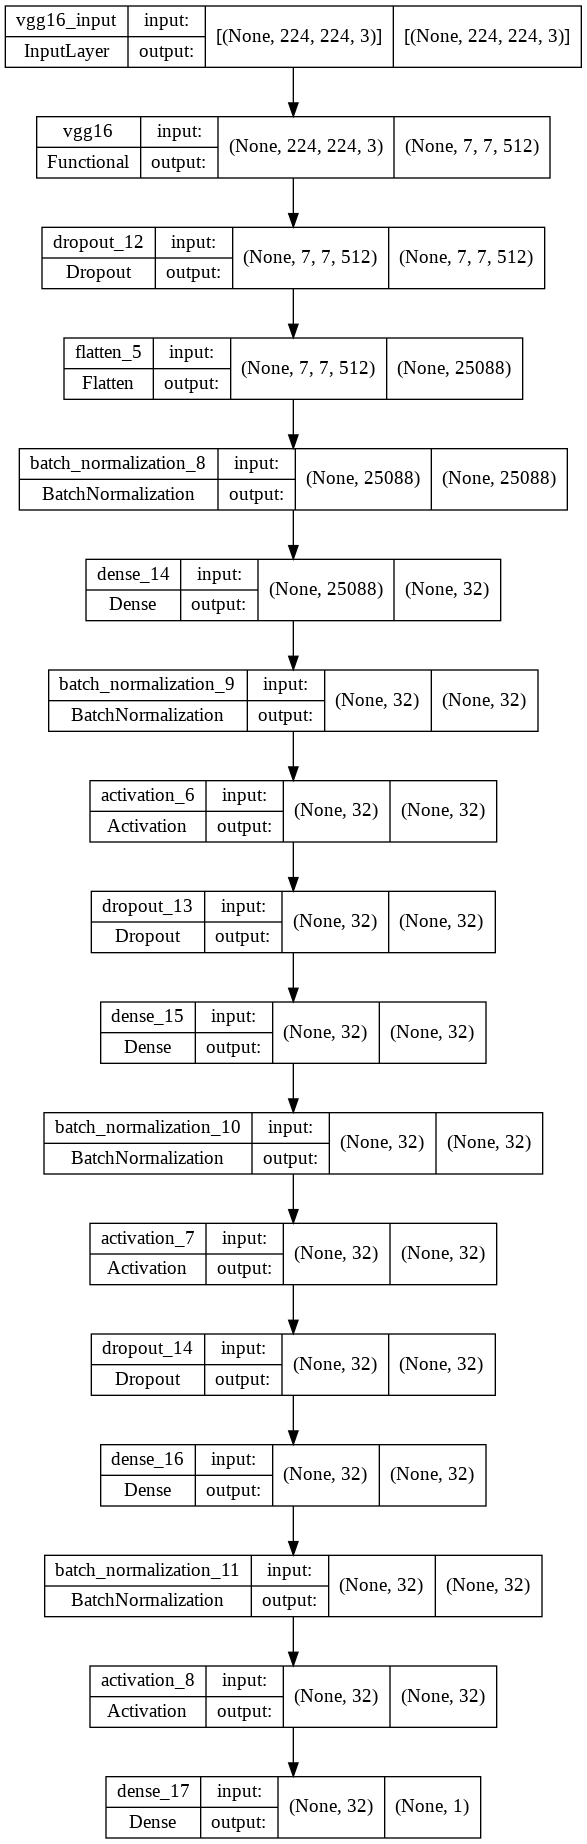

In [81]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG16.png')

In [82]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
13/13 [==============================] - ETA: 0s - loss: 0.7642 - Accuracy: 0.6754 - Precision: 0.8810 - Recall: 0.1907 - AUC: 0.7332 - F1: 0.0187

13/13 [==============================] - 9s 497ms/step - loss: 0.7642 - Accuracy: 0.6754 - Precision: 0.8810 - Recall: 0.1907 - AUC: 0.7332 - F1: 0.0187 - val_loss: 1.4642 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8564 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
13/13 [==============================] - ETA: 0s - loss: 0.6323 - Accuracy: 0.6244 - Precision: 0.6667 - Recall: 0.0667 - AUC: 0.7389 - F1: 0.0965

13/13 [==============================] - 6s 473ms/step - loss: 0.6323 - Accuracy: 0.6244 - Precision: 0.6667 - Recall: 0.0667 - AUC: 0.7389 - F1: 0.0965 - val_loss: 1.1112 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9177 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/36
13/13 [==============================] - ETA: 0s - loss: 0.5975 - Accuracy: 0.6321 - Precision: 0.6818 - Recall: 0.1000 - AUC: 0.7514 - F1: 0.1748

13/13 [==============================] - 6s 442ms/step - loss: 0.5975 - Accuracy: 0.6321 - Precision: 0.6818 - Recall: 0.1000 - AUC: 0.7514 - F1: 0.1748 - val_loss: 1.1118 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9625 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 4/36
13/13 [==============================] - ETA: 0s - loss: 0.5303 - Accuracy: 0.6632 - Precision: 0.7632 - Recall: 0.1933 - AUC: 0.8345 - F1: 0.2746

13/13 [==============================] - 6s 440ms/step - loss: 0.5303 - Accuracy: 0.6632 - Precision: 0.7632 - Recall: 0.1933 - AUC: 0.8345 - F1: 0.2746 - val_loss: 0.7371 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9848 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 5/36
13/13 [==============================] - ETA: 0s - loss: 0.5231 - Accuracy: 0.7124 - Precision: 0.7910 - Recall: 0.3533 - AUC: 0.8321 - F1: 0.4262

13/13 [==============================] - 7s 552ms/step - loss: 0.5231 - Accuracy: 0.7124 - Precision: 0.7910 - Recall: 0.3533 - AUC: 0.8321 - F1: 0.4262 - val_loss: 0.7117 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.9747 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 6/36
13/13 [==============================] - ETA: 0s - loss: 0.4822 - Accuracy: 0.7461 - Precision: 0.7600 - Recall: 0.5067 - AUC: 0.8592 - F1: 0.5598

13/13 [==============================] - 6s 446ms/step - loss: 0.4822 - Accuracy: 0.7461 - Precision: 0.7600 - Recall: 0.5067 - AUC: 0.8592 - F1: 0.5598 - val_loss: 0.5879 - val_Accuracy: 0.6852 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.9856 - val_F1: 0.2000 - lr: 0.0010
Epoch 7/36
13/13 [==============================] - ETA: 0s - loss: 0.4709 - Accuracy: 0.7746 - Precision: 0.7739 - Recall: 0.5933 - AUC: 0.8706 - F1: 0.6614

13/13 [==============================] - 6s 444ms/step - loss: 0.4709 - Accuracy: 0.7746 - Precision: 0.7739 - Recall: 0.5933 - AUC: 0.8706 - F1: 0.6614 - val_loss: 0.4481 - val_Accuracy: 0.7222 - val_Precision: 1.0000 - val_Recall: 0.2857 - val_AUC: 0.9856 - val_F1: 0.2857 - lr: 0.0010
Epoch 8/36
13/13 [==============================] - ETA: 0s - loss: 0.4435 - Accuracy: 0.8083 - Precision: 0.7468 - Recall: 0.7667 - AUC: 0.8909 - F1: 0.6970

13/13 [==============================] - 6s 443ms/step - loss: 0.4435 - Accuracy: 0.8083 - Precision: 0.7468 - Recall: 0.7667 - AUC: 0.8909 - F1: 0.6970 - val_loss: 0.4387 - val_Accuracy: 0.7407 - val_Precision: 1.0000 - val_Recall: 0.3333 - val_AUC: 0.9827 - val_F1: 0.4974 - lr: 0.0010
Epoch 9/36
13/13 [==============================] - ETA: 0s - loss: 0.4116 - Accuracy: 0.8316 - Precision: 0.7931 - Recall: 0.7667 - AUC: 0.9121 - F1: 0.7187

13/13 [==============================] - 6s 446ms/step - loss: 0.4116 - Accuracy: 0.8316 - Precision: 0.7931 - Recall: 0.7667 - AUC: 0.9121 - F1: 0.7187 - val_loss: 0.3327 - val_Accuracy: 0.9074 - val_Precision: 1.0000 - val_Recall: 0.7619 - val_AUC: 0.9776 - val_F1: 0.8512 - lr: 0.0010
Epoch 10/36
13/13 [==============================] - ETA: 0s - loss: 0.4182 - Accuracy: 0.8238 - Precision: 0.7808 - Recall: 0.7600 - AUC: 0.9002 - F1: 0.7165

13/13 [==============================] - 6s 444ms/step - loss: 0.4182 - Accuracy: 0.8238 - Precision: 0.7808 - Recall: 0.7600 - AUC: 0.9002 - F1: 0.7165 - val_loss: 0.2903 - val_Accuracy: 0.9074 - val_Precision: 1.0000 - val_Recall: 0.7619 - val_AUC: 0.9870 - val_F1: 0.8545 - lr: 0.0010
Epoch 11/36
13/13 [==============================] - ETA: 0s - loss: 0.3970 - Accuracy: 0.8782 - Precision: 0.8239 - Recall: 0.8733 - AUC: 0.9256 - F1: 0.7816

13/13 [==============================] - 6s 442ms/step - loss: 0.3970 - Accuracy: 0.8782 - Precision: 0.8239 - Recall: 0.8733 - AUC: 0.9256 - F1: 0.7816 - val_loss: 0.2868 - val_Accuracy: 0.9259 - val_Precision: 1.0000 - val_Recall: 0.8095 - val_AUC: 0.9820 - val_F1: 0.8643 - lr: 0.0010
Epoch 12/36
13/13 [==============================] - ETA: 0s - loss: 0.3869 - Accuracy: 0.8627 - Precision: 0.8012 - Recall: 0.8600 - AUC: 0.9205 - F1: 0.8290

13/13 [==============================] - 6s 441ms/step - loss: 0.3869 - Accuracy: 0.8627 - Precision: 0.8012 - Recall: 0.8600 - AUC: 0.9205 - F1: 0.8290 - val_loss: 0.2732 - val_Accuracy: 0.9444 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9784 - val_F1: 0.9250 - lr: 0.0010
Epoch 13/36
13/13 [==============================] - ETA: 0s - loss: 0.3469 - Accuracy: 0.8756 - Precision: 0.7965 - Recall: 0.9133 - AUC: 0.9414 - F1: 0.7833

13/13 [==============================] - 6s 440ms/step - loss: 0.3469 - Accuracy: 0.8756 - Precision: 0.7965 - Recall: 0.9133 - AUC: 0.9414 - F1: 0.7833 - val_loss: 0.2406 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9820 - val_F1: 0.9783 - lr: 0.0010
Epoch 14/36
13/13 [==============================] - ETA: 0s - loss: 0.3352 - Accuracy: 0.8938 - Precision: 0.8225 - Recall: 0.9267 - AUC: 0.9475 - F1: 0.8050

13/13 [==============================] - 6s 441ms/step - loss: 0.3352 - Accuracy: 0.8938 - Precision: 0.8225 - Recall: 0.9267 - AUC: 0.9475 - F1: 0.8050 - val_loss: 0.2327 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9812 - val_F1: 0.9706 - lr: 0.0010
Epoch 15/36
13/13 [==============================] - ETA: 0s - loss: 0.3332 - Accuracy: 0.8912 - Precision: 0.8103 - Recall: 0.9400 - AUC: 0.9422 - F1: 0.7991

13/13 [==============================] - 7s 549ms/step - loss: 0.3332 - Accuracy: 0.8912 - Precision: 0.8103 - Recall: 0.9400 - AUC: 0.9422 - F1: 0.7991 - val_loss: 0.2277 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9791 - val_F1: 0.9783 - lr: 0.0010
Epoch 16/36
13/13 [==============================] - ETA: 0s - loss: 0.2977 - Accuracy: 0.8912 - Precision: 0.8293 - Recall: 0.9067 - AUC: 0.9608 - F1: 0.8010

13/13 [==============================] - 6s 443ms/step - loss: 0.2977 - Accuracy: 0.8912 - Precision: 0.8293 - Recall: 0.9067 - AUC: 0.9608 - F1: 0.8010 - val_loss: 0.2088 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9863 - val_F1: 0.9545 - lr: 0.0010
Epoch 17/36
13/13 [==============================] - ETA: 0s - loss: 0.2913 - Accuracy: 0.9067 - Precision: 0.8608 - Recall: 0.9067 - AUC: 0.9654 - F1: 0.8110

13/13 [==============================] - 6s 442ms/step - loss: 0.2913 - Accuracy: 0.9067 - Precision: 0.8608 - Recall: 0.9067 - AUC: 0.9654 - F1: 0.8110 - val_loss: 0.2174 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9820 - val_F1: 0.9667 - lr: 0.0010
Epoch 18/36
13/13 [==============================] - ETA: 0s - loss: 0.2842 - Accuracy: 0.9016 - Precision: 0.8373 - Recall: 0.9267 - AUC: 0.9583 - F1: 0.8039

13/13 [==============================] - 6s 437ms/step - loss: 0.2842 - Accuracy: 0.9016 - Precision: 0.8373 - Recall: 0.9267 - AUC: 0.9583 - F1: 0.8039 - val_loss: 0.2033 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9899 - val_F1: 0.9762 - lr: 0.0010
Epoch 19/36
13/13 [==============================] - ETA: 0s - loss: 0.2650 - Accuracy: 0.9145 - Precision: 0.8634 - Recall: 0.9267 - AUC: 0.9636 - F1: 0.8218

13/13 [==============================] - 6s 445ms/step - loss: 0.2650 - Accuracy: 0.9145 - Precision: 0.8634 - Recall: 0.9267 - AUC: 0.9636 - F1: 0.8218 - val_loss: 0.2046 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9841 - val_F1: 0.9815 - lr: 0.0010
Epoch 20/36
13/13 [==============================] - ETA: 0s - loss: 0.2961 - Accuracy: 0.8938 - Precision: 0.8428 - Recall: 0.8933 - AUC: 0.9513 - F1: 0.7981

13/13 [==============================] - 6s 442ms/step - loss: 0.2961 - Accuracy: 0.8938 - Precision: 0.8428 - Recall: 0.8933 - AUC: 0.9513 - F1: 0.7981 - val_loss: 0.1970 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9877 - val_F1: 0.9800 - lr: 0.0010
Epoch 21/36
13/13 [==============================] - ETA: 0s - loss: 0.2883 - Accuracy: 0.8886 - Precision: 0.8057 - Recall: 0.9400 - AUC: 0.9582 - F1: 0.8681

13/13 [==============================] - 6s 447ms/step - loss: 0.2883 - Accuracy: 0.8886 - Precision: 0.8057 - Recall: 0.9400 - AUC: 0.9582 - F1: 0.8681 - val_loss: 0.2073 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9841 - val_F1: 0.9783 - lr: 0.0010
Epoch 22/36
13/13 [==============================] - ETA: 0s - loss: 0.2772 - Accuracy: 0.9016 - Precision: 0.8373 - Recall: 0.9267 - AUC: 0.9602 - F1: 0.8138

13/13 [==============================] - 6s 448ms/step - loss: 0.2772 - Accuracy: 0.9016 - Precision: 0.8373 - Recall: 0.9267 - AUC: 0.9602 - F1: 0.8138 - val_loss: 0.2002 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9827 - val_F1: 0.9815 - lr: 0.0010
Epoch 23/36
12/13 [==========================>...] - ETA: 0s - loss: 0.2615 - Accuracy: 0.9062 - Precision: 0.8314 - Recall: 0.9533 - AUC: 0.9670 - F1: 0.8867

13/13 [==============================] - 7s 516ms/step - loss: 0.2620 - Accuracy: 0.9067 - Precision: 0.8314 - Recall: 0.9533 - AUC: 0.9670 - F1: 0.8185 - val_loss: 0.1850 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9841 - val_F1: 0.9800 - lr: 0.0010
Epoch 24/36
12/13 [==========================>...] - ETA: 0s - loss: 0.2442 - Accuracy: 0.9219 - Precision: 0.8614 - Recall: 0.9533 - AUC: 0.9643 - F1: 0.9028

13/13 [==============================] - 6s 442ms/step - loss: 0.2435 - Accuracy: 0.9223 - Precision: 0.8614 - Recall: 0.9533 - AUC: 0.9646 - F1: 0.8333 - val_loss: 0.1936 - val_Accuracy: 0.9630 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9812 - val_F1: 0.9286 - lr: 0.0010
Epoch 25/36
13/13 [==============================] - ETA: 0s - loss: 0.2623 - Accuracy: 0.9041 - Precision: 0.8424 - Recall: 0.9267 - AUC: 0.9576 - F1: 0.8055

13/13 [==============================] - 6s 443ms/step - loss: 0.2623 - Accuracy: 0.9041 - Precision: 0.8424 - Recall: 0.9267 - AUC: 0.9576 - F1: 0.8055 - val_loss: 0.2057 - val_Accuracy: 0.9444 - val_Precision: 0.9091 - val_Recall: 0.9524 - val_AUC: 0.9733 - val_F1: 0.9516 - lr: 0.0010
Epoch 26/36
13/13 [==============================] - ETA: 0s - loss: 0.2994 - Accuracy: 0.8886 - Precision: 0.8166 - Recall: 0.9200 - AUC: 0.9500 - F1: 0.7927
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


13/13 [==============================] - 6s 443ms/step - loss: 0.2994 - Accuracy: 0.8886 - Precision: 0.8166 - Recall: 0.9200 - AUC: 0.9500 - F1: 0.7927 - val_loss: 0.1975 - val_Accuracy: 0.9259 - val_Precision: 0.8696 - val_Recall: 0.9524 - val_AUC: 0.9784 - val_F1: 0.9011 - lr: 0.0010
Epoch 26: early stopping


In [83]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

4/4 [==============================] - 1s 152ms/step - loss: 0.1537 - Accuracy: 0.9735 - Precision: 0.9362 - Recall: 1.0000 - AUC: 0.9885 - F1: 0.9669


<h1 align="center" ><a id='mobilenet'><b>MobileNet<b></a></h1>

In [84]:
MOBILENET_base =  tf.keras.applications.MobileNet(input_shape=(224,224,3), include_top= False)

for layer in MOBILENET_base.layers:
    layer.trainable = False

MOBILENET=tf.keras.Sequential()
MOBILENET.add(MOBILENET_base)
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Flatten())
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MOBILENET.summary()

MOBILENET.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 7, 7, 1024)        0         
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 batch_normalization_12 (Bat  (None, 50176)            200704    
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 32)                1605664   
                                                                 
 batch_normalization_13 (Bat  (None, 32)              

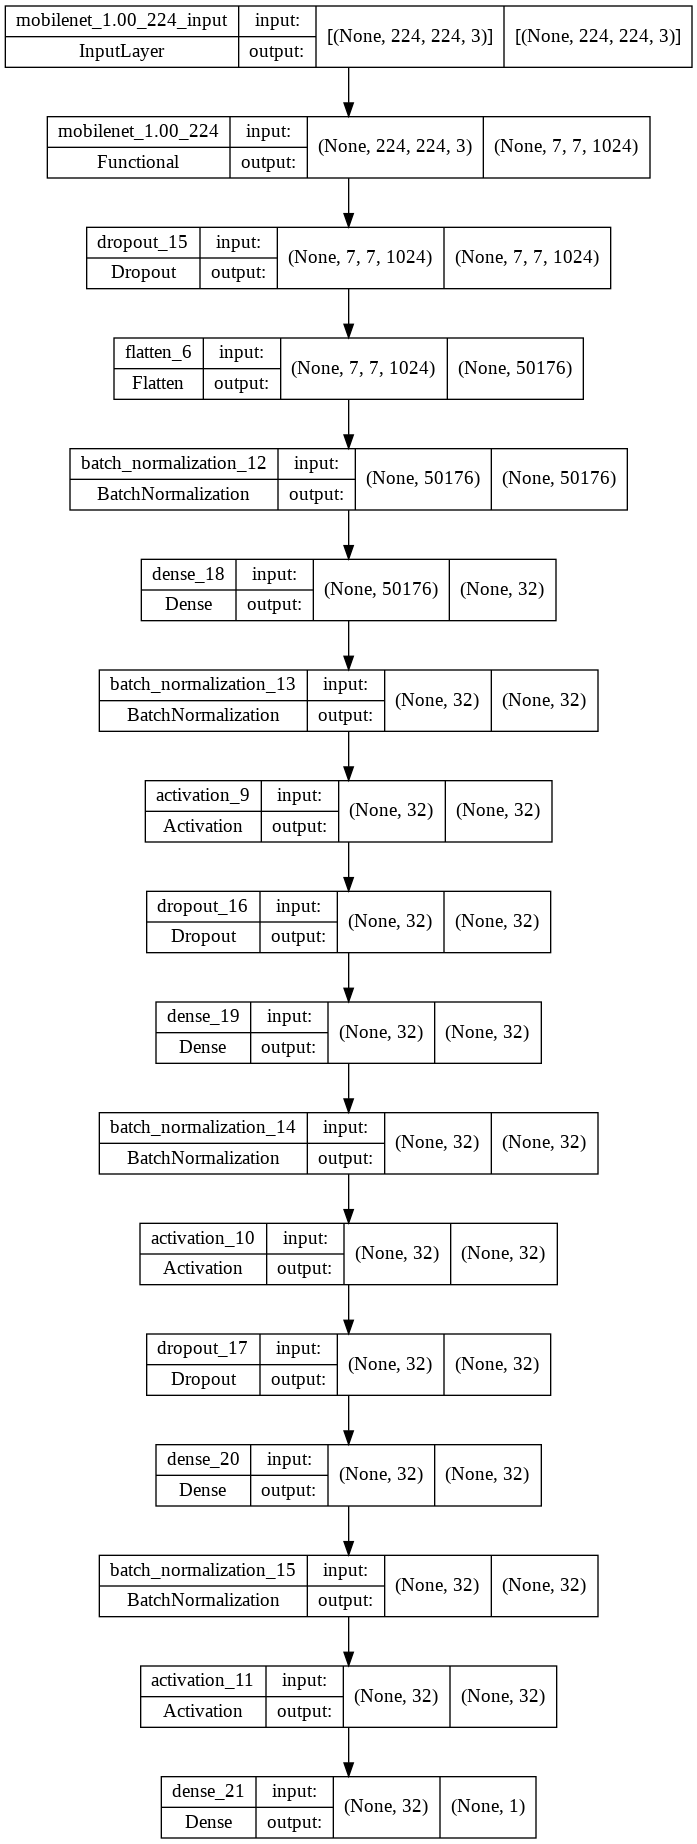

In [85]:
tf.keras.utils.plot_model(MOBILENET, to_file='MOBILENET.png', show_shapes=True,show_layer_names=True)
Image(filename='MOBILENET.png')

In [86]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('MOBILENET.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

MOBILENET.fit(train_dataset,validation_data=valid_dataset,epochs = 36,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/36
13/13 [==============================] - ETA: 0s - loss: 0.6366 - Accuracy: 0.6914 - Precision: 0.5962 - Recall: 0.6392 - AUC: 0.7839 - F1: 0.4703

13/13 [==============================] - 9s 460ms/step - loss: 0.6366 - Accuracy: 0.6914 - Precision: 0.5962 - Recall: 0.6392 - AUC: 0.7839 - F1: 0.4703 - val_loss: 2.2850 - val_Accuracy: 0.6111 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8095 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/36
12/13 [==========================>...] - ETA: 0s - loss: 0.5689 - Accuracy: 0.6953 - Precision: 0.6067 - Recall: 0.6107 - AUC: 0.7541 - F1: 0.6087

13/13 [==============================] - 5s 382ms/step - loss: 0.5676 - Accuracy: 0.6969 - Precision: 0.6093 - Recall: 0.6133 - AUC: 0.7564 - F1: 0.6388 - val_loss: 1.4671 - val_Accuracy: 0.6667 - val_Precision: 1.0000 - val_Recall: 0.1429 - val_AUC: 0.8810 - val_F1: 0.2500 - lr: 0.0010
Epoch 3/36
13/13 [==============================] - ETA: 0s - loss: 0.5383 - Accuracy: 0.7176 - Precision: 0.6358 - Recall: 0.6400 - AUC: 0.8004 - F1: 0.5845

13/13 [==============================] - 5s 376ms/step - loss: 0.5383 - Accuracy: 0.7176 - Precision: 0.6358 - Recall: 0.6400 - AUC: 0.8004 - F1: 0.5845 - val_loss: 0.8684 - val_Accuracy: 0.8148 - val_Precision: 1.0000 - val_Recall: 0.5238 - val_AUC: 0.9286 - val_F1: 0.6833 - lr: 0.0010
Epoch 4/36
13/13 [==============================] - ETA: 0s - loss: 0.4726 - Accuracy: 0.7953 - Precision: 0.7591 - Recall: 0.6933 - AUC: 0.8788 - F1: 0.7408

13/13 [==============================] - 6s 501ms/step - loss: 0.4726 - Accuracy: 0.7953 - Precision: 0.7591 - Recall: 0.6933 - AUC: 0.8788 - F1: 0.7408 - val_loss: 0.5788 - val_Accuracy: 0.8333 - val_Precision: 1.0000 - val_Recall: 0.5714 - val_AUC: 0.9264 - val_F1: 0.6348 - lr: 0.0010
Epoch 5/36
13/13 [==============================] - ETA: 0s - loss: 0.4083 - Accuracy: 0.8627 - Precision: 0.8170 - Recall: 0.8333 - AUC: 0.9283 - F1: 0.8117

13/13 [==============================] - 5s 377ms/step - loss: 0.4083 - Accuracy: 0.8627 - Precision: 0.8170 - Recall: 0.8333 - AUC: 0.9283 - F1: 0.8117 - val_loss: 0.4259 - val_Accuracy: 0.8704 - val_Precision: 1.0000 - val_Recall: 0.6667 - val_AUC: 0.9387 - val_F1: 0.8007 - lr: 0.0010
Epoch 6/36
13/13 [==============================] - ETA: 0s - loss: 0.4187 - Accuracy: 0.8394 - Precision: 0.7933 - Recall: 0.7933 - AUC: 0.9089 - F1: 0.7291

13/13 [==============================] - 5s 376ms/step - loss: 0.4187 - Accuracy: 0.8394 - Precision: 0.7933 - Recall: 0.7933 - AUC: 0.9089 - F1: 0.7291 - val_loss: 0.3424 - val_Accuracy: 0.8889 - val_Precision: 1.0000 - val_Recall: 0.7143 - val_AUC: 0.9704 - val_F1: 0.8194 - lr: 0.0010
Epoch 7/36
13/13 [==============================] - ETA: 0s - loss: 0.3764 - Accuracy: 0.8627 - Precision: 0.8540 - Recall: 0.7800 - AUC: 0.9386 - F1: 0.7509

13/13 [==============================] - 5s 380ms/step - loss: 0.3764 - Accuracy: 0.8627 - Precision: 0.8540 - Recall: 0.7800 - AUC: 0.9386 - F1: 0.7509 - val_loss: 0.1894 - val_Accuracy: 0.9444 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9913 - val_F1: 0.9206 - lr: 0.0010
Epoch 8/36
13/13 [==============================] - ETA: 0s - loss: 0.3687 - Accuracy: 0.8627 - Precision: 0.8593 - Recall: 0.7733 - AUC: 0.9361 - F1: 0.8242

13/13 [==============================] - 6s 462ms/step - loss: 0.3687 - Accuracy: 0.8627 - Precision: 0.8593 - Recall: 0.7733 - AUC: 0.9361 - F1: 0.8242 - val_loss: 0.1507 - val_Accuracy: 0.9444 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9921 - val_F1: 0.9000 - lr: 0.0010
Epoch 9/36
13/13 [==============================] - ETA: 0s - loss: 0.2988 - Accuracy: 0.9171 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9696 - F1: 0.8926

13/13 [==============================] - 5s 379ms/step - loss: 0.2988 - Accuracy: 0.9171 - Precision: 0.9155 - Recall: 0.8667 - AUC: 0.9696 - F1: 0.8926 - val_loss: 0.1234 - val_Accuracy: 0.9444 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9957 - val_F1: 0.9086 - lr: 0.0010
Epoch 10/36
13/13 [==============================] - ETA: 0s - loss: 0.3134 - Accuracy: 0.8808 - Precision: 0.8514 - Recall: 0.8400 - AUC: 0.9527 - F1: 0.7832

13/13 [==============================] - 5s 380ms/step - loss: 0.3134 - Accuracy: 0.8808 - Precision: 0.8514 - Recall: 0.8400 - AUC: 0.9527 - F1: 0.7832 - val_loss: 0.0973 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9928 - val_F1: 0.9667 - lr: 0.0010
Epoch 11/36
13/13 [==============================] - ETA: 0s - loss: 0.2659 - Accuracy: 0.9275 - Precision: 0.9178 - Recall: 0.8933 - AUC: 0.9739 - F1: 0.9169

13/13 [==============================] - 5s 377ms/step - loss: 0.2659 - Accuracy: 0.9275 - Precision: 0.9178 - Recall: 0.8933 - AUC: 0.9739 - F1: 0.9169 - val_loss: 0.0870 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9899 - val_F1: 0.9706 - lr: 0.0010
Epoch 12/36
13/13 [==============================] - ETA: 0s - loss: 0.2604 - Accuracy: 0.9249 - Precision: 0.9060 - Recall: 0.9000 - AUC: 0.9742 - F1: 0.8975

13/13 [==============================] - 5s 374ms/step - loss: 0.2604 - Accuracy: 0.9249 - Precision: 0.9060 - Recall: 0.9000 - AUC: 0.9742 - F1: 0.8975 - val_loss: 0.0910 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9928 - val_F1: 0.9762 - lr: 0.0010
Epoch 13/36
13/13 [==============================] - ETA: 0s - loss: 0.2528 - Accuracy: 0.9171 - Precision: 0.8782 - Recall: 0.9133 - AUC: 0.9709 - F1: 0.9041

13/13 [==============================] - 5s 380ms/step - loss: 0.2528 - Accuracy: 0.9171 - Precision: 0.8782 - Recall: 0.9133 - AUC: 0.9709 - F1: 0.9041 - val_loss: 0.0904 - val_Accuracy: 0.9630 - val_Precision: 0.9524 - val_Recall: 0.9524 - val_AUC: 0.9942 - val_F1: 0.9583 - lr: 0.0010
Epoch 14/36
13/13 [==============================] - ETA: 0s - loss: 0.2097 - Accuracy: 0.9508 - Precision: 0.9338 - Recall: 0.9400 - AUC: 0.9860 - F1: 0.9381

13/13 [==============================] - 5s 418ms/step - loss: 0.2097 - Accuracy: 0.9508 - Precision: 0.9338 - Recall: 0.9400 - AUC: 0.9860 - F1: 0.9381 - val_loss: 0.0841 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9942 - val_F1: 0.9783 - lr: 0.0010
Epoch 15/36
13/13 [==============================] - ETA: 0s - loss: 0.1922 - Accuracy: 0.9482 - Precision: 0.9392 - Recall: 0.9267 - AUC: 0.9875 - F1: 0.8650

13/13 [==============================] - 5s 382ms/step - loss: 0.1922 - Accuracy: 0.9482 - Precision: 0.9392 - Recall: 0.9267 - AUC: 0.9875 - F1: 0.8650 - val_loss: 0.0747 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9942 - val_F1: 0.9800 - lr: 0.0010
Epoch 16/36
13/13 [==============================] - ETA: 0s - loss: 0.2125 - Accuracy: 0.9171 - Precision: 0.8882 - Recall: 0.9000 - AUC: 0.9777 - F1: 0.8298

13/13 [==============================] - 5s 382ms/step - loss: 0.2125 - Accuracy: 0.9171 - Precision: 0.8882 - Recall: 0.9000 - AUC: 0.9777 - F1: 0.8298 - val_loss: 0.0769 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9949 - val_F1: 0.9800 - lr: 0.0010
Epoch 17/36
13/13 [==============================] - ETA: 0s - loss: 0.2032 - Accuracy: 0.9378 - Precision: 0.9091 - Recall: 0.9333 - AUC: 0.9799 - F1: 0.8515

13/13 [==============================] - 5s 380ms/step - loss: 0.2032 - Accuracy: 0.9378 - Precision: 0.9091 - Recall: 0.9333 - AUC: 0.9799 - F1: 0.8515 - val_loss: 0.0792 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9957 - val_F1: 0.9839 - lr: 0.0010
Epoch 18/36
13/13 [==============================] - ETA: 0s - loss: 0.1769 - Accuracy: 0.9430 - Precision: 0.9103 - Recall: 0.9467 - AUC: 0.9870 - F1: 0.9276
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


13/13 [==============================] - 5s 382ms/step - loss: 0.1769 - Accuracy: 0.9430 - Precision: 0.9103 - Recall: 0.9467 - AUC: 0.9870 - F1: 0.9276 - val_loss: 0.0889 - val_Accuracy: 0.9815 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9942 - val_F1: 0.9667 - lr: 0.0010
Epoch 18: early stopping


In [87]:
MOBILENET_scores = MOBILENET.evaluate(test_dataset, verbose=1)

4/4 [==============================] - 0s 81ms/step - loss: 0.0499 - Accuracy: 0.9912 - Precision: 0.9778 - Recall: 1.0000 - AUC: 0.9997 - F1: 0.9929


<div style='font-size:100%;'>
    <a id='example'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Example: Prediction vs Truth </center>
    </h1>
</div></center>

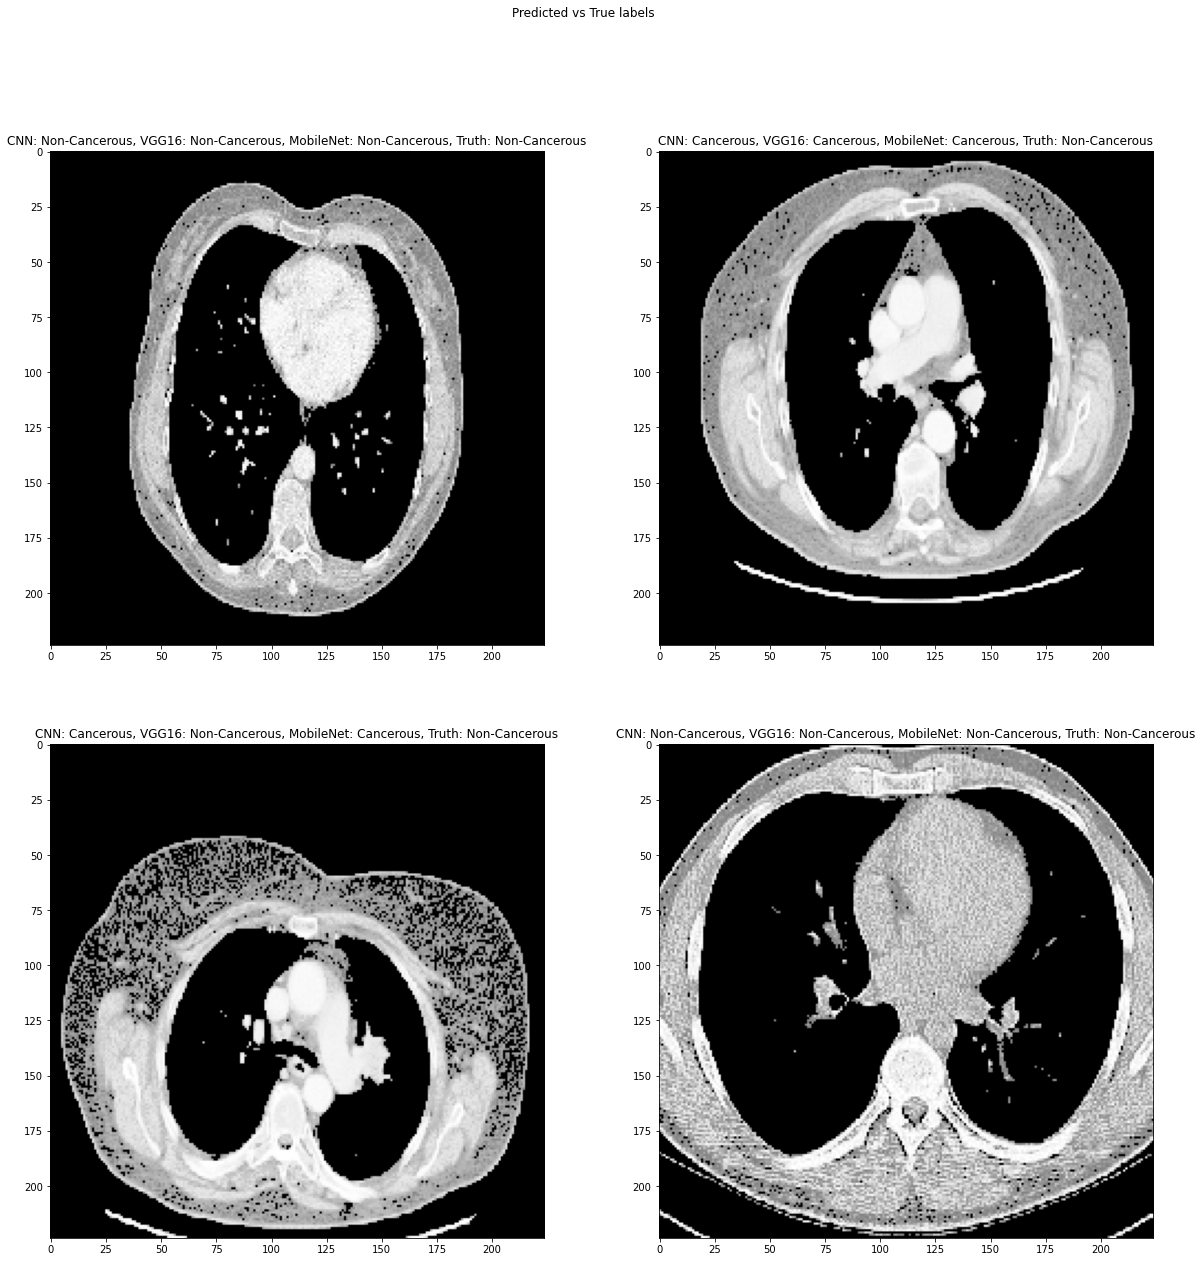

In [95]:
batch = next(test_dataset)

def predAll(batch, i):
  label_dict = {0: 'Cancerous', 1: 'Non-Cancerous'}
  cnnPred = 0 if CNN.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg16Pred = 0 if VGG16.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  mobilenetPred = 0 if MOBILENET.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  
  return f'CNN: {label_dict[cnnPred]}, VGG16: {label_dict[vgg16Pred]}, MobileNet: {label_dict[mobilenetPred]}, Truth: {label_dict[int(batch[1][0])]}'


plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
plt.imshow(batch[0][0])
label = predAll(batch, 0)
ax1.set_title(label)


ax2 = plt.subplot(2, 2, 2)
plt.imshow(batch[0][1])
label = predAll(batch, 1)
ax2.set_title(label)

ax3 = plt.subplot(2, 2, 3)
plt.imshow(batch[0][2])
label = predAll(batch, 2)
ax3.set_title(label)

ax4 = plt.subplot(2, 2, 4)
plt.imshow(batch[0][3])
label = predAll(batch, 3)
ax4.set_title(label)


plt.suptitle('Predicted vs True labels')
plt.show()


In [39]:
eval = [CNN_scores, VGG16_scores, MOBILENET_scores]
eval

[[0.4017655849456787,
  0.8672566413879395,
  0.939393937587738,
  0.7045454382896423,
  0.946475625038147,
  0.7409874200820923],
 [0.169094517827034,
  0.982300877571106,
  0.95652174949646,
  1.0,
  0.9999999403953552,
  0.9798711538314819],
 [0.03885573521256447,
  0.991150438785553,
  0.9777777791023254,
  1.0,
  1.0,
  0.9900000095367432]]

<div style='font-size:100%;'>
    <a id='analysis'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Comparative analysis of the models </center>
    </h1>
</div></center>

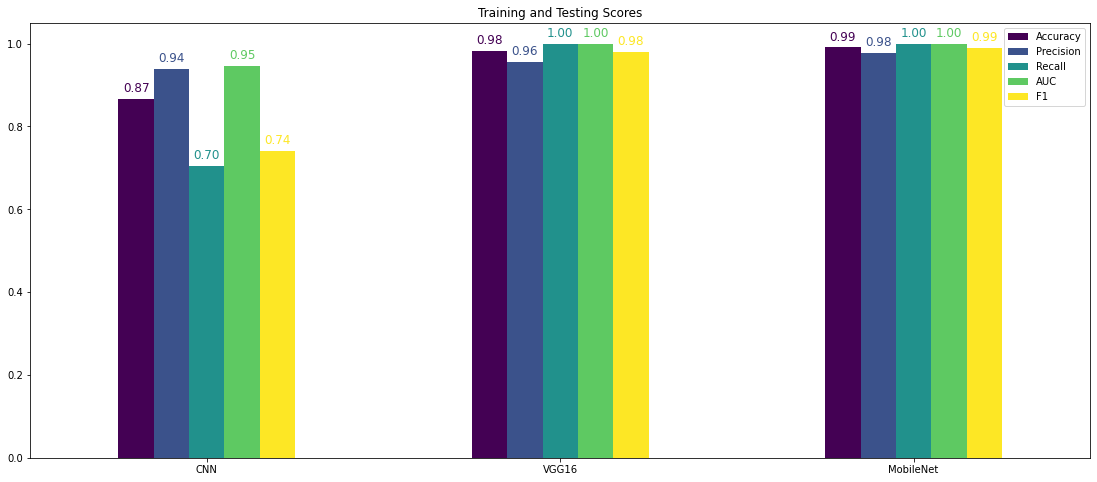

In [96]:
indices = ['CNN', 'VGG16', 'MobileNet']
scores = pd.DataFrame({'Accuracy': [item[1] for item in eval],'Precision': [item[2] for item in eval], 'Recall': [item[3] for item in eval], 'AUC': [item[4] for item in eval], 'F1': [item[5] for item in eval]}, index=indices)
plot = scores.plot.bar(figsize=(19, 8), rot=0, cmap='viridis')
plt.title('Training and Testing Scores')
plot.bar_label(plot.containers[0], padding=4, color='#440154', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[1], padding=4, color='#3b528b', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[2], padding=4, color='#21918c', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[3], padding=4, color='#5ec962', fontsize=12, fmt='%.2f')
plot.bar_label(plot.containers[4], padding=4, color='#fde725', fontsize=12, fmt='%.2f')

plt.show()

In [48]:
scores

,Accuracy,Precision,Recall,AUC,F1
CNN,0.867257,0.939394,0.704545,0.946476,0.740987
VGG16,0.982301,0.956522,1.000000,1.000000,0.979871
MobileNet,0.991150,0.977778,1.000000,1.000000,0.990000


<div style='font-size:100%;'>
    <a id='references'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> References </center>
    </h1>
</div></center>


1. [1] Tekade, Ruchita, and K. Rajeswari. "Lung cancer detection and classification using deep learning." 2018 Fourth International Conference on Computing Communication Control and Automation (ICCUBEA). IEEE, 2018.
2. [2] Bhatia, Siddharth, Yash Sinha, and Lavika Goel. "Lung cancer detection: a deep learning approach." Soft Computing for Problem Solving. Springer, Singapore, 2019. 699-705.
3. [3] Radhika, P. R., Rakhi AS Nair, and G. Veena. "A comparative study of lung cancer detection using machine learning algorithms." 2019 IEEE International Conference on Electrical, Computer and Communication Technologies (ICECCT). IEEE, 2019.
4. [4] Shakeel, P. Mohamed, Mohd Aboobaider Burhanuddin, and Mohamad Ishak Desa. "Lung cancer detection from CT image using improved profuse clustering and deep learning instantaneously trained neural networks." Measurement 145 (2019): 702-712.
5. [5] Asuntha, A., and Andy Srinivasan. "Deep learning for lung Cancer detection and classification." Multimedia Tools and Applications 79.11 (2020): 7731-7762.
6. [6] Joshua, Eali Stephen Neal, Midhun Chakkravarthy, and Debnath Bhattacharyya. "An Extensive Review on Lung Cancer Detection Using Machine Learning Techniques: A Systematic Study." Rev. d'Intelligence Artif. 34.3 (2020): 351-359.
7. [7] Alsinglawi, Belal, et al. "An explainable machine learning framework for lung cancer hospital length of stay prediction." Scientific reports 12.1 (2022): 1-10.
8. [8] Yan, Sha, et al. "Computed Tomography Images under Deep Learning Algorithm in the Diagnosis of Perioperative Rehabilitation Nursing for Patients with Lung Cancer." Scientific Programming 2022 (2022).
9. [9] Elnakib, Ahmed, Hanan M. Amer, and Fatma EZ Abou-Chadi. "Early lung cancer detection using deep learning optimization." (2020): 82-94.
10. [10] Shimazaki, Akitoshi, et al. "Deep learning-based algorithm for lung cancer detection on chest radiographs using the segmentation method." Scientific reports 12.1 (2022): 1-10.
11. [11] Hosseini, Hesamoddin, Reza Monsefi, and Shabnam Shadroo. "Deep Learning Applications for Lung Cancer Diagnosis: A systematic review." arXiv preprint arXiv:2201.00227 (2022).
12. [12] Li, Wenzhe, et al. "Machine Learning-Assisted Dual-Marker Detection in Serum Small Extracellular Vesicles for the Diagnosis and Prognosis Prediction of Non-Small Cell Lung Cancer." Nanomaterials 12.5 (2022): 809.